In [6]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import algoritmo.data_import as dataI
import pandas as pd
import numpy as np
import matplotlib as plt
from algoritmo.AVG_CSVS import get_avg_notebook 
from algoritmo.predictions import write_csv

from sklearn.tree import DecisionTreeRegressor

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.metrics import mean_squared_error

In [2]:
train = dataI.get_train()

In [3]:
train.head()

,id,duration,start_station_id,subscription_type,start_date_weekday,start_date_month,start_date_hour,city,mean_temperature_f,precipitation_inches
0,907649,396,50,1,3,8,8,0,7,1
1,432022,4120,50,2,5,8,14,0,6,1
2,224386,4675,50,2,6,3,16,0,4,1
3,298292,1595,50,2,0,5,13,0,5,1
4,133980,384,50,1,0,12,8,0,3,1


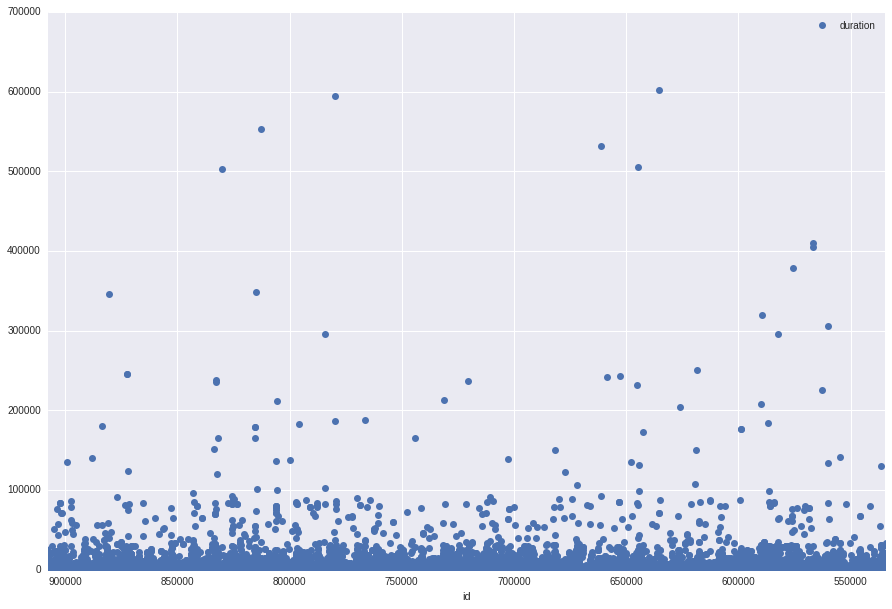

In [7]:
train.plot(x='id' , y = 'duration', style='o',figsize=(15,10))

plt.show()

In [8]:
train.describe()

,id,duration,start_station_id,subscription_type,start_date_weekday,start_date_month,start_date_hour,city,mean_temperature_f,precipitation_inches
count,549952.000000,549952.000000,549952.000000,549952.000000,549952.000000,549952.000000,549952.000000,549952.000000,549952.000000,549952.000000
mean,460440.104273,1066.235024,57.852316,1.153790,2.406545,6.476091,13.092243,0.188586,4.566415,1.007435
std,264601.205030,5504.686246,17.094874,0.360747,1.749716,3.276498,4.552930,0.669225,1.352018,0.103213
min,4069.000000,60.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,231276.000000,344.000000,50.000000,1.000000,1.000000,4.000000,9.000000,0.000000,4.000000,1.000000
50%,459326.000000,517.000000,62.000000,1.000000,2.000000,7.000000,13.000000,0.000000,5.000000,1.000000
75%,692659.250000,755.000000,70.000000,1.000000,4.000000,9.000000,17.000000,0.000000,6.000000,1.000000
max,913459.000000,602338.000000,84.000000,2.000000,6.000000,12.000000,23.000000,4.000000,10.000000,4.000000


In [10]:
real_duration = pd.read_csv('real_durations')
real_duration.head(20)

,id,real_duration
0,524288,7005
1,524289,428
2,262149,346
3,524294,6600
4,524297,651
5,611033,492
6,262155,1084
7,786444,736
8,786459,314
9,786460,316


In [4]:
mean_squared_errors = []

avg = get_avg_notebook(1)
avg = pd.DataFrame(avg, columns=['id', 'duration'])
mean_squared_errors.append(sum(abs(avg.duration-real_duration.real_duration)) / float(len(real_duration.real_duration)))


avg = get_avg_notebook(10)
avg = pd.DataFrame(avg, columns=['id', 'duration'])
mean_squared_errors.append(sum(abs(avg.duration-real_duration.real_duration)) / float(len(real_duration.real_duration)))


avg = get_avg_notebook(100)
avg = pd.DataFrame(avg, columns=['id', 'duration'])
mean_squared_errors.append(sum(abs(avg.duration-real_duration.real_duration)) / float(len(real_duration.real_duration)))


avg = get_avg_notebook(200)
avg = pd.DataFrame(avg, columns=['id', 'duration'])
mean_squared_errors.append(sum(abs(avg.duration-real_duration.real_duration)) / float(len(real_duration.real_duration)))


avg = get_avg_notebook(300)
avg = pd.DataFrame(avg, columns=['id', 'duration'])
mean_squared_errors.append(sum(abs(avg.duration-real_duration.real_duration)) / float(len(real_duration.real_duration)))


avg = get_avg_notebook(340)
avg = pd.DataFrame(avg, columns=['id', 'duration'])
mean_squared_errors.append(sum(abs(avg.duration-real_duration.real_duration)) / float(len(real_duration.real_duration)))


--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/0prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/0prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/1prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/2prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/3prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/4prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/5prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/6prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/7prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/8prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/9prediction.csv
--------------> OBTENIENDO PREDICCION DE: ../../modelo/algoritmo/0prediction.csv
--------------> OBTENIENDO P

In [53]:
print mean_squared_errors

[927.70247004116732, 903.09191819863668, 896.75418756979286, 895.15313588559809]


In [5]:
n = len(avg)
for i in range(0, len(mean_squared_errors)):
    mean_squared_errors[i] = mean_squared_errors[i] * n
print mean_squared_errors

[122075059.0, 108953888.0, 108369224.0, 107608709.0, 107416586.0, 107359751.0]


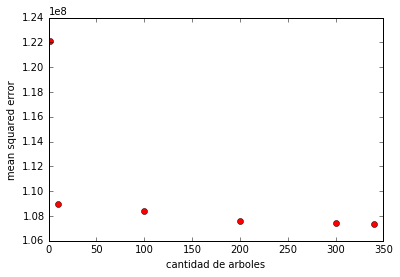

In [6]:
import matplotlib.pyplot as plt
plt.plot([1,10,100,200,300, 340], mean_squared_errors, 'ro')
plt.ylabel('mean squared error')
plt.xlabel('cantidad de arboles')
# plt.axis([-3, 310, 894, 930])
plt.show()

In [14]:
real_duration.describe()

,id,real_duration
count,119998.000000,119998.000000
mean,460107.964241,1082.900957
std,264508.667412,6541.291144
min,4080.000000,60.000000
25%,230241.250000,345.000000
50%,458917.000000,518.000000
75%,692193.250000,756.000000
max,913460.000000,655939.000000


AttributeError: 'module' object has no attribute 'show'

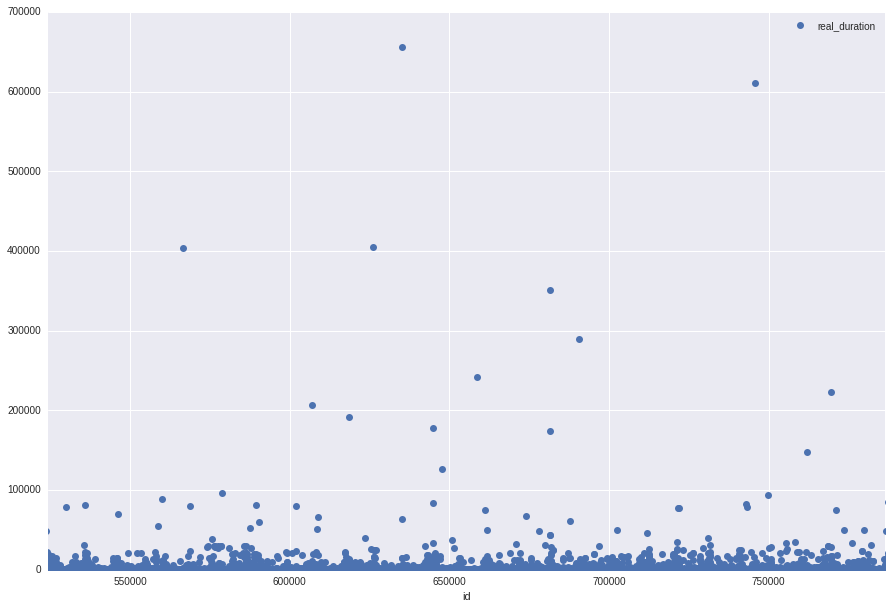

In [13]:
real_duration.plot(x='id' , y = 'real_duration', style='o',figsize=(15,10))

plt.show()